In [1]:
import random

import requests
!conda install -c conda-forge folium=0.5.0 --yes
import folium
!conda install -c conda-forge geopy --yes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
print('imported!')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py_0 conda-forge
    branca:  0.3.0-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge

branca-0.3.0-p 100% |################################| Time: 0:00:00 809.14 kB/s
vincent-0.4.4- 100% |################################| Time: 0:00:00 933.41 kB/s
altair-2.2.2-p 100% |################################| Time: 0:00:00   1.34 MB/s
folium-0.5.0-p 100% |################################| Time: 0:00:00  35.94 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.16.0-py_0 conda-forge

geographiclib- 100% |###########################

In [18]:
CLIENT_ID = '53WQOY0ATAV30EO0IFMMNP12QKOZFUZGMIDPEUKDEABXCHOZ' # your Foursquare ID
CLIENT_SECRET = 'R54I35L3C2E2WGJMODFU2INTOBLCDY3GYNKZKVNWUYYKINAH' # your Foursquare Secret
VERSION = '20180817'
limit = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
geolocator=Nominatim(timeout=8)
def get_latlong(address):
    geolocator = Nominatim()
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return (latitude, longitude)

Your credentails:
CLIENT_ID: 53WQOY0ATAV30EO0IFMMNP12QKOZFUZGMIDPEUKDEABXCHOZ
CLIENT_SECRET:R54I35L3C2E2WGJMODFU2INTOBLCDY3GYNKZKVNWUYYKINAH


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/geopy/geocoders/osm.py:138: UserWarning: Using Nominatim with the default "geopy/1.16.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [12]:
def get_venues(address, search_query):
    radius = 500
    latitude, longitude = get_latlong(address)
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&search_query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, limit)
    results = requests.get(url).json()
    venues = results['response']['venues']
    return venues

In [19]:
Nominatim(user_agent="my-application")
address = 'Colaba,Mumbai,India'
search_query = 'cafe'

venues = get_venues(address, search_query)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/geopy/geocoders/osm.py:138: UserWarning: Using Nominatim with the default "geopy/1.16.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [20]:
df_venues = json_normalize(venues)
df_venues

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,4d528f5a7ee1a35db82c9b34,BMP Building,IN,Mumbai,India,"N.A. Sawant Marg, Colaba",47,"[BMP Building (N.A. Sawant Marg, Colaba), Mumb...","[{'label': 'display', 'lat': 18.91468193238237...",18.914682,72.826100,NaN,Mahārāshtra,project 88,v-1534541334
1,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,4c64e9fcae7195210e58957b,"Ayubsons, Opp. Chirag Din Showroom",IN,Mumbai,India,Wodehouse Road,191,"[Ayubsons, Opp. Chirag Din Showroom (Wodehouse...","[{'label': 'display', 'lat': 18.91524370184546...",18.915244,72.824160,NaN,Mahārāshtra,Cafe Coffee Day,v-1534541334
2,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,527c8105498eff4cc16d636f,NaN,IN,NaN,India,NaN,129,[India],"[{'label': 'display', 'lat': 18.91620445251465...",18.916204,72.826340,NaN,NaN,BP Bunk Colaba,v-1534541334
3,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,4b0587d2f964a52004a322e3,Colaba Causeway,IN,Mumbai,India,NaN,159,"[Colaba Causeway, Mumbai 400005, Mahārāshtra, ...","[{'label': 'display', 'lat': 18.91383357099943...",18.913834,72.825241,400005,Mahārāshtra,Sassoon Dock,v-1534541334
4,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,50543afce4b0719d679c2c53,NaN,IN,Mumbai,India,NaN,180,"[Mumbai, Mahārāshtra, India]","[{'label': 'display', 'lat': 18.91495513916015...",18.914955,72.824257,NaN,Mahārāshtra,Central Lunch Home,v-1534541334
5,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,4fa28b42e4b0489ba39eb5b0,NaN,IN,NaN,India,NaN,191,[India],"[{'label': 'display', 'lat': 18.91663866388964...",18.916639,72.826758,NaN,NaN,Welldone Hairdressers,v-1534541334
6,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,521205ee93cd5a372b05db8e,"73, Near Fire Brigade, Shaheed Bhagatsingh Road,",IN,Mumbai,India,"Colaba,",122,"[73, Near Fire Brigade, Shaheed Bhagatsingh Ro...","[{'label': 'display', 'lat': 18.91605052374466...",18.916051,72.826535,400005,Mahārāshtra,Bp Petrol Pump,v-1534541334
7,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,576fd12a498e6907b1b59126,NaN,IN,NaN,India,NaN,107,[India],"[{'label': 'display', 'lat': 18.914137, 'lng':...",18.914137,72.826130,NaN,NaN,Go Bonkers,v-1534541334
8,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,5135faebe4b0e122e62b887b,Wood house Road,IN,Mumbai,India,Colaba,111,"[Wood house Road (Colaba), Mumbai 400005, Mahā...","[{'label': 'display', 'lat': 18.91541398609178...",18.915414,72.824964,400005,Mahārāshtra,Prabath Book Store,v-1534541334
9,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,4d8f0823ca75b60c24070ca9,"3 and 4, President House, Wodehouse road, Colaba",IN,Mumbai,India,Colaba,225,"[3 and 4, President House, Wodehouse road, Col...","[{'label': 'display', 'lat': 18.91486657330943...",18.914867,72.823843,400005,Mahārāshtra,Jean Claude Biguine Salon,v-1534541334


In [10]:
df_venues = df_venues[['name', 'id']]
df_venues


,name,id
0,project 88,4d528f5a7ee1a35db82c9b34
1,Cafe Coffee Day,4c64e9fcae7195210e58957b
2,BP Bunk Colaba,527c8105498eff4cc16d636f
3,Sassoon Dock,4b0587d2f964a52004a322e3
4,Central Lunch Home,50543afce4b0719d679c2c53
5,Welldone Hairdressers,4fa28b42e4b0489ba39eb5b0
6,Bp Petrol Pump,521205ee93cd5a372b05db8e
7,Go Bonkers,576fd12a498e6907b1b59126
8,Prabath Book Store,5135faebe4b0e122e62b887b
9,Jean Claude Biguine Salon,4d8f0823ca75b60c24070ca9


In [15]:
def get_rating(venue_id):
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    try:
        result = requests.get(url).json()
        return result['response']['venue']['rating']
    except:
        return None

In [21]:
ratings = []
for i in range(df_venues.shape[0]):
    ratings.append(get_rating(df_venues.iloc[i].id))

In [22]:
ratings


[None,
 6.5,
 None,
 6.6,
 None,
 None,
 None,
 None,
 None,
 6.9,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [26]:
df_venues['rating'] = ratings
df_venues

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,rating
0,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,4d528f5a7ee1a35db82c9b34,BMP Building,IN,Mumbai,India,"N.A. Sawant Marg, Colaba",47,"[BMP Building (N.A. Sawant Marg, Colaba), Mumb...","[{'label': 'display', 'lat': 18.91468193238237...",18.914682,72.826100,NaN,Mahārāshtra,project 88,v-1534541334,NaN
1,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,4c64e9fcae7195210e58957b,"Ayubsons, Opp. Chirag Din Showroom",IN,Mumbai,India,Wodehouse Road,191,"[Ayubsons, Opp. Chirag Din Showroom (Wodehouse...","[{'label': 'display', 'lat': 18.91524370184546...",18.915244,72.824160,NaN,Mahārāshtra,Cafe Coffee Day,v-1534541334,6.5
2,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,527c8105498eff4cc16d636f,NaN,IN,NaN,India,NaN,129,[India],"[{'label': 'display', 'lat': 18.91620445251465...",18.916204,72.826340,NaN,NaN,BP Bunk Colaba,v-1534541334,NaN
3,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,4b0587d2f964a52004a322e3,Colaba Causeway,IN,Mumbai,India,NaN,159,"[Colaba Causeway, Mumbai 400005, Mahārāshtra, ...","[{'label': 'display', 'lat': 18.91383357099943...",18.913834,72.825241,400005,Mahārāshtra,Sassoon Dock,v-1534541334,6.6
4,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,50543afce4b0719d679c2c53,NaN,IN,Mumbai,India,NaN,180,"[Mumbai, Mahārāshtra, India]","[{'label': 'display', 'lat': 18.91495513916015...",18.914955,72.824257,NaN,Mahārāshtra,Central Lunch Home,v-1534541334,NaN
5,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,4fa28b42e4b0489ba39eb5b0,NaN,IN,NaN,India,NaN,191,[India],"[{'label': 'display', 'lat': 18.91663866388964...",18.916639,72.826758,NaN,NaN,Welldone Hairdressers,v-1534541334,NaN
6,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,521205ee93cd5a372b05db8e,"73, Near Fire Brigade, Shaheed Bhagatsingh Road,",IN,Mumbai,India,"Colaba,",122,"[73, Near Fire Brigade, Shaheed Bhagatsingh Ro...","[{'label': 'display', 'lat': 18.91605052374466...",18.916051,72.826535,400005,Mahārāshtra,Bp Petrol Pump,v-1534541334,NaN
7,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,576fd12a498e6907b1b59126,NaN,IN,NaN,India,NaN,107,[India],"[{'label': 'display', 'lat': 18.914137, 'lng':...",18.914137,72.826130,NaN,NaN,Go Bonkers,v-1534541334,NaN
8,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,5135faebe4b0e122e62b887b,Wood house Road,IN,Mumbai,India,Colaba,111,"[Wood house Road (Colaba), Mumbai 400005, Mahā...","[{'label': 'display', 'lat': 18.91541398609178...",18.915414,72.824964,400005,Mahārāshtra,Prabath Book Store,v-1534541334,NaN
9,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,4d8f0823ca75b60c24070ca9,"3 and 4, President House, Wodehouse road, Colaba",IN,Mumbai,India,Colaba,225,"[3 and 4, President House, Wodehouse road, Col...","[{'label': 'display', 'lat': 18.91486657330943...",18.914867,72.823843,400005,Mahārāshtra,Jean Claude Biguine Salon,v-1534541334,6.9


In [27]:
df_venues = df_venues.sort_values('rating', axis=0, ascending=False)

In [29]:
df_venues.dropna()
df_venues


,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,rating
9,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,4d8f0823ca75b60c24070ca9,"3 and 4, President House, Wodehouse road, Colaba",IN,Mumbai,India,Colaba,225,"[3 and 4, President House, Wodehouse road, Col...","[{'label': 'display', 'lat': 18.91486657330943...",18.914867,72.823843,400005,Mahārāshtra,Jean Claude Biguine Salon,v-1534541334,6.9
3,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,4b0587d2f964a52004a322e3,Colaba Causeway,IN,Mumbai,India,NaN,159,"[Colaba Causeway, Mumbai 400005, Mahārāshtra, ...","[{'label': 'display', 'lat': 18.91383357099943...",18.913834,72.825241,400005,Mahārāshtra,Sassoon Dock,v-1534541334,6.6
1,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,4c64e9fcae7195210e58957b,"Ayubsons, Opp. Chirag Din Showroom",IN,Mumbai,India,Wodehouse Road,191,"[Ayubsons, Opp. Chirag Din Showroom (Wodehouse...","[{'label': 'display', 'lat': 18.91524370184546...",18.915244,72.824160,NaN,Mahārāshtra,Cafe Coffee Day,v-1534541334,6.5
0,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,4d528f5a7ee1a35db82c9b34,BMP Building,IN,Mumbai,India,"N.A. Sawant Marg, Colaba",47,"[BMP Building (N.A. Sawant Marg, Colaba), Mumb...","[{'label': 'display', 'lat': 18.91468193238237...",18.914682,72.826100,NaN,Mahārāshtra,project 88,v-1534541334,NaN
2,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,527c8105498eff4cc16d636f,NaN,IN,NaN,India,NaN,129,[India],"[{'label': 'display', 'lat': 18.91620445251465...",18.916204,72.826340,NaN,NaN,BP Bunk Colaba,v-1534541334,NaN
4,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,50543afce4b0719d679c2c53,NaN,IN,Mumbai,India,NaN,180,"[Mumbai, Mahārāshtra, India]","[{'label': 'display', 'lat': 18.91495513916015...",18.914955,72.824257,NaN,Mahārāshtra,Central Lunch Home,v-1534541334,NaN
5,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,4fa28b42e4b0489ba39eb5b0,NaN,IN,NaN,India,NaN,191,[India],"[{'label': 'display', 'lat': 18.91663866388964...",18.916639,72.826758,NaN,NaN,Welldone Hairdressers,v-1534541334,NaN
6,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,521205ee93cd5a372b05db8e,"73, Near Fire Brigade, Shaheed Bhagatsingh Road,",IN,Mumbai,India,"Colaba,",122,"[73, Near Fire Brigade, Shaheed Bhagatsingh Ro...","[{'label': 'display', 'lat': 18.91605052374466...",18.916051,72.826535,400005,Mahārāshtra,Bp Petrol Pump,v-1534541334,NaN
7,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,576fd12a498e6907b1b59126,NaN,IN,NaN,India,NaN,107,[India],"[{'label': 'display', 'lat': 18.914137, 'lng':...",18.914137,72.826130,NaN,NaN,Go Bonkers,v-1534541334,NaN
8,"[{'icon': {'suffix': '.png', 'prefix': 'https:...",False,5135faebe4b0e122e62b887b,Wood house Road,IN,Mumbai,India,Colaba,111,"[Wood house Road (Colaba), Mumbai 400005, Mahā...","[{'label': 'display', 'lat': 18.91541398609178...",18.915414,72.824964,400005,Mahārāshtra,Prabath Book Store,v-1534541334,NaN


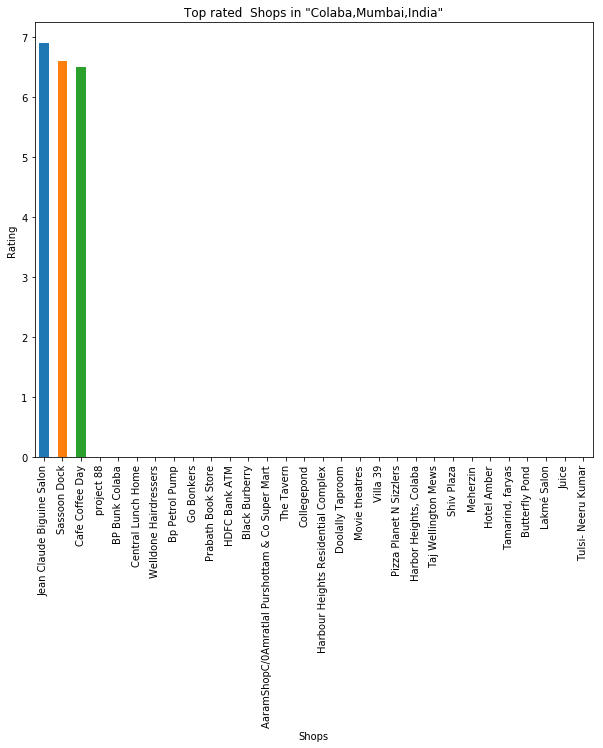

In [37]:

df_venues['rating'].plot(kind='bar', figsize=(10,8))
plt.ylabel('Rating')
plt.xlabel('Shops')
plt.title('Top rated  Shops in "{}"'.format(address))
plt.show()

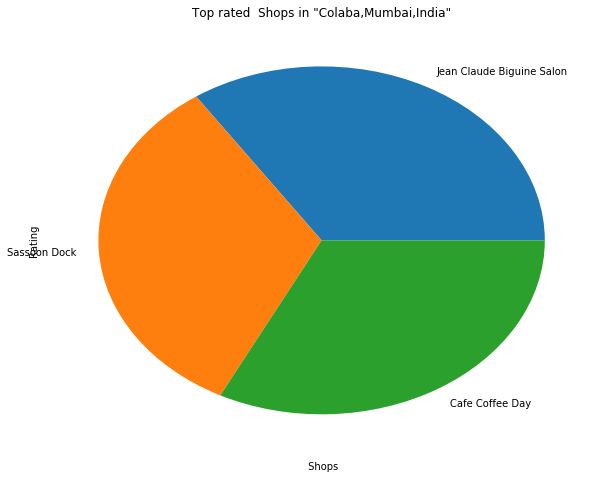

In [38]:

df_venues['rating'].plot(kind='pie', figsize=(10,8))
plt.ylabel('Rating')
plt.xlabel(' Shops')
plt.title('Top rated  Shops in "{}"'.format(address))
plt.show()


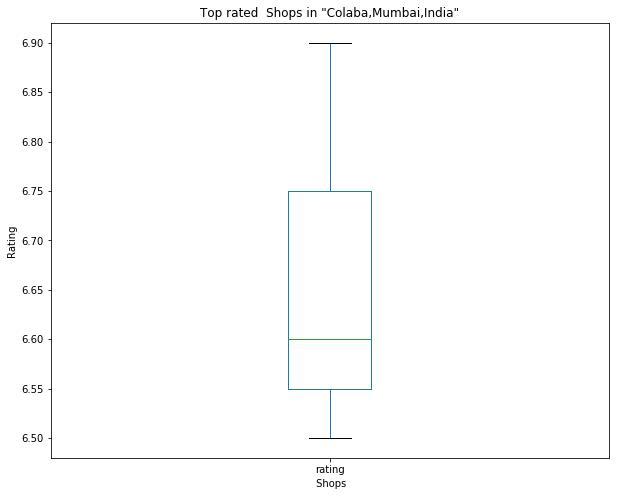